In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import  make_blobs
from sklearn.cluster import KMeans

In [ ]:
#Clustering，估值。比較唔到，處理一個無答案問題，本身冇LABEL去估LABEL

[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


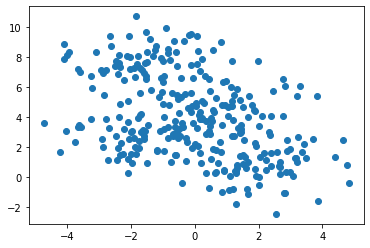

In [13]:
x,y = make_blobs(n_samples = 300, centers =4 ,cluster_std = 1.2,random_state = 0)
print(y)
plt.scatter(x[:,0],x[:,1])

#make_blobs一口氣gen 3 條columns,centers第一個係SAMPLE，有幾多舊野；cluster_std：影響散亂程度；random_state：用另一條formuler RUNRUN


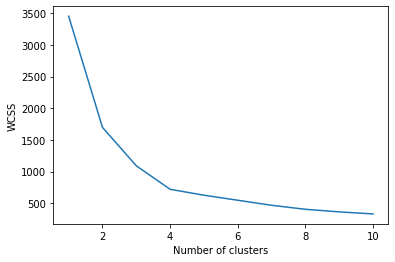

In [14]:
#must use this chart,去到邊個cluster跌得無咁多，就無答案

wcss = []
for i in range(1,11):
  kmeans = KMeans (n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() #WCSS = Within Cluster Sum of Squares

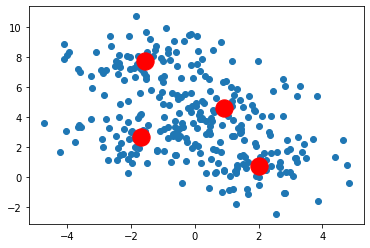

In [15]:
##cluster會選邊partpart
kmeans = KMeans (n_clusters = 4,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.show()
                 

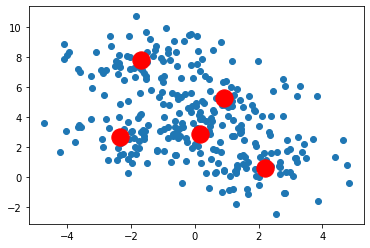

In [16]:
##cluster會選邊partpart
kmeans = KMeans (n_clusters = 5,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.show()
                 

In [19]:
df = pd.DataFrame(x)
labels = kmeans.fit(x)
print(labels.labels_)
df['labels'] = labels.labels_
print(df)
df['labels']=df['labels'].replace([0,1,2,3,4],['Name1','Name2','Name3','Name4','Name5'])
print(df)

[2 4 1 4 2 3 0 1 4 4 0 4 1 4 3 2 1 3 2 2 3 3 1 0 0 0 3 1 0 2 4 4 1 1 4 4 4
 4 0 3 2 0 4 1 0 2 4 0 4 3 0 3 4 3 2 2 1 2 4 3 4 1 4 2 0 2 4 3 4 0 1 2 4 0
 0 4 0 1 3 4 3 2 2 3 4 1 3 1 4 4 2 3 4 0 2 2 2 3 4 0 4 3 4 3 1 3 3 1 4 1 2
 0 3 4 3 3 4 2 2 1 2 3 2 3 2 3 3 0 2 0 4 0 0 3 4 2 0 4 2 1 4 2 2 4 1 0 4 2
 4 4 4 1 1 1 3 2 4 0 3 1 4 2 2 2 1 0 3 1 2 2 2 4 3 1 1 4 3 3 2 2 3 1 0 0 1
 1 1 1 3 4 2 2 1 2 0 0 0 2 0 4 2 2 3 0 2 0 0 4 1 1 1 0 1 1 4 2 2 3 3 1 4 3
 3 0 3 0 2 1 4 1 1 4 2 2 2 1 3 2 4 0 3 1 3 4 4 4 4 0 2 1 1 0 3 1 0 0 1 3 3
 4 1 1 0 3 4 2 2 4 1 3 3 0 0 3 3 3 2 1 4 4 3 3 3 3 3 3 4 2 4 2 3 3 4 4 4 3
 3 1 1 0]
            0         1  labels
0   -0.381554  3.375055       2
1   -1.579060  6.983786       4
2    1.334156  5.895450       1
3   -0.788977  7.794369       4
4    0.487435  2.887420       2
..        ...       ...     ...
295  1.892128  2.261933       3
296  2.981416  1.885869       3
297 -0.098290  4.768070       1
298  1.987213  7.746750       1
299 -2.056011  2.581456       0

[300 

In [ ]:
#純fix data set,無商業價值


In [20]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
xs = np.array([1.0,2.0,3.0,4.0,5.0],dtype='float')
ys = np.array([1.0,1.5,2.0,2.5,3.0],dtype='float')

In [23]:
model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 853ms/step - loss: 2.7576
Epoch 2/500
1/1 [==============================] - 0s 17ms/step - loss: 1.6173
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 0.9527
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5654
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3396
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2080
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.1312
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0863
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0602
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0448
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0358
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 13/500
1/1 [==============================] - 0

4.0641823


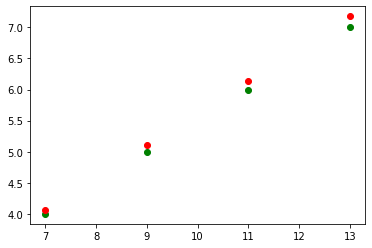

In [27]:
print(model.predict([7])[0][0])

test = np.array([7,9,11,13])
ground_truth = [4,5,6,7]
predictions = [y[0] for  y in model.predict(test)]
plt.scatter(test,ground_truth,c='g')
plt.scatter(test,predictions,c='red')
plt.show()

In [31]:
#webscraping
import bs4 as bs
import urllib.request

source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Joe_Biden').read()

soup = bs.BeautifulSoup(source,'lxml')

#每一個tag

print(soup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Joe Biden - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4ca71fa5-70a2-4b0d-8492-1169812a0dff","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Joe_Biden","wgTitle":"Joe Biden","wgCurRevisionId":1092386252,"wgRevisionId":1092386252,"wgArticleId":145422,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Hungarian-language sources (hu)","Source attribution","All articles with dead external links","Articles with dead external links from January 2021","Articles with

In [38]:
# a tag = hyperlink
print(soup.title)
print(soup.title.name)
print(soup.title.string)
print(soup.title.parent.name)

list1=[]
for tag in soup.find_all(['a']):
  list1.append(tag.text)

print(list1)

<title>Joe Biden - Wikipedia</title>
title
Joe Biden - Wikipedia
head
['', '', 'Jump to navigation', 'Jump to search', 'Beau Biden', 'Biden (disambiguation)', '', 'President of the United States', 'Incumbent', 'Vice President', 'Kamala Harris', 'Donald Trump', 'Vice President of the United States', 'Barack Obama', 'Dick Cheney', 'Mike Pence', 'United States Senator', 'Delaware', 'J. Caleb Boggs', 'Ted Kaufman', 'Scranton, Pennsylvania', 'Democratic', 'Independent', 'Neilia Hunter', 'Jill Jacobs', 'Beau', 'Hunter', 'Naomi', 'Ashley', 'Biden family', 'Alma mater', 'University of Delaware', 'BA', 'Syracuse University', 'JD', 'List of honors and awards', '', 'Campaign website', 'White House website', 'International Narcotics Control Caucus', '[n 1]', 'Senate Foreign Relations Committee', 'Senate Judiciary Committee', '/ˈbaɪdən/', 'BY-dən', 'president of the United States', 'Democratic Party', 'vice president', 'Barack Obama', 'Delaware', 'United States Senate', 'Scranton, Pennsylvania', 'N

In [ ]:
# individual project,5-10 mins,要有insight！！！！